#                                         DATA SCIENCE INTERNSHIP AT LETSGROWMORE

## TASK 6 : Prediction using Decision Tree Algorithm


### Importing all the dependencies

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
import warnings as wg
wg.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
# Reading the dataset
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['PetalWidthCm'].max()

2.5

In [5]:
# Number of rows and columns 
print('Number of rows : ', df.shape[0])
print('Number of columns : ', df.shape[1])

Number of rows :  150
Number of columns :  6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# checking the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# checking the datatypes of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## DATA VISUALIZATION

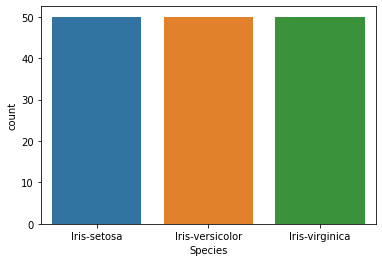

In [10]:
# Counting the number of class in species column
sns.countplot(x=df['Species'])
plt.show()

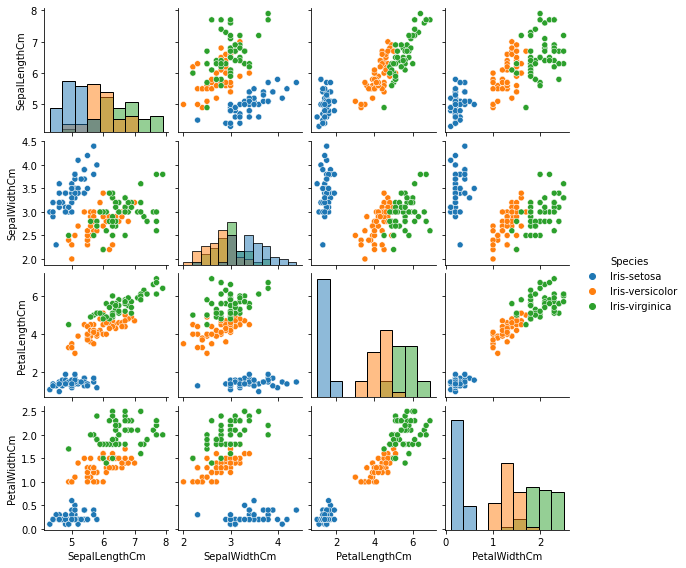

In [11]:
# Pairplot
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=2, diag_kind="hist")
plt.show()

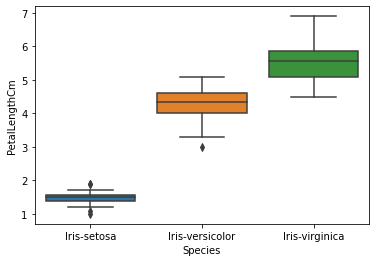

In [12]:
# Box Plot
sns.boxplot(x="Species", y="PetalLengthCm", data=df )
plt.show()

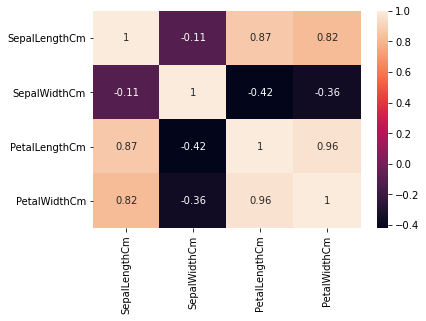

In [13]:
# Heatmap
sns.heatmap(df.drop("Id", axis=1).corr(),annot=True)
plt.show()

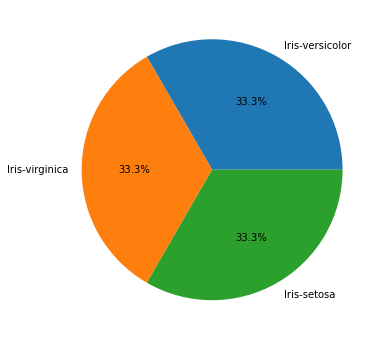

In [14]:
# Pie chart
py=df['Species'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(py ,labels=py.index , autopct="%.1f%%")
plt.xticks()
plt.show()

In [15]:
# Converting Target variable into numerical using label encoding
dict = {'Iris-setosa' : 0, 'Iris-versicolor' : 1 ,'Iris-virginica' : 2 }
  
# Print the dictionary
print(dict)
  
# Remap the values of the dataframe
df.replace({"Species": dict},inplace=True)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


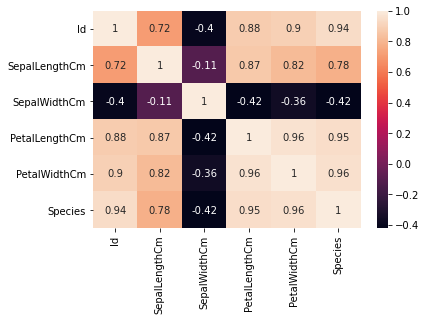

In [16]:
# HeatMap with Target Variable
sns.heatmap(df.corr(),annot=True)
plt.show()

### Splitting the data into Training and testing 

In [17]:
# Feature variable and Target variable
X=df.iloc[:,0:4]
y=df['Species']

In [18]:
# Training and testing data
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [20]:
X.shape

(150, 4)

## Building the  Model

In [21]:
# Using Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=1234)

In [22]:
# Fitting x_train,y_train into model
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [23]:
# predictions
y_preds=dtc.predict(X_test)

### Evaluation Metrics

In [24]:
# Classification report
result=classification_report(y_test,y_preds)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
# Accuracy score
print(accuracy_score(y_test,y_preds))

1.0


In [26]:
# Comparison of Actual and Prediction values
comparison=pd.DataFrame({'Actual Value': y_test,'Prediction Value': y_preds})
comparison.head()

,Actual Value,Prediction Value
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


# Visualisation of Decision Tree Classifier

In [27]:
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes=np.array(['setosa','versicolor','virginica'])

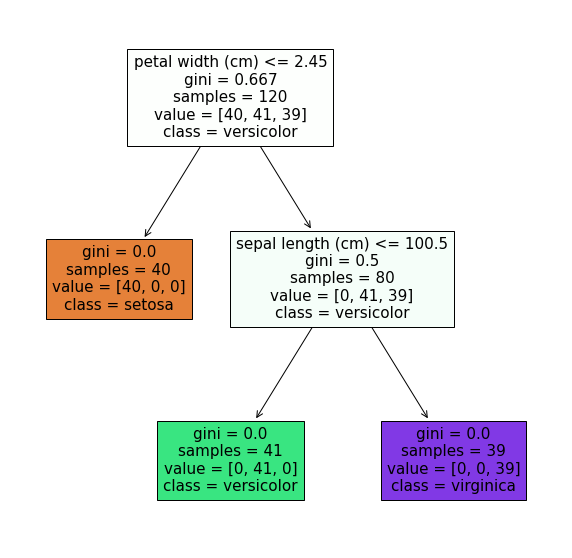

In [28]:
from sklearn import tree
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dtc,feature_names=features,class_names=classes,filled=True)
plt.show()

In [29]:
# Defining function
def classify(a,b,c,d):
    data=np.array([a,b,c,d])
    data=data.reshape(1,-1)
    data=pd.DataFrame(data)
    prediction=DTC_MODEL.predict(data)
    if prediction == 0 :
        print("Iris-setosa")
    elif prediction== 1:
        print("Iris-versicolor")
    else:
        print("Iris-virginica")

In [30]:
# Saving the Model
import pickle
pickle.dump(dtc,open('dtc.pkl',"wb"))